In [319]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F

In [320]:
mnist_train = datasets.MNIST(root='./datasets', train=True, transform=transforms.ToTensor(), download=True)

mnist_test = datasets.MNIST(root='./datasets', train=False, transform=transforms.ToTensor(), download=True)

print("MNIST train data shape: ", mnist_train.data.shape)
print("MNIST test data shape: ", mnist_test.data.shape)

MNIST train data shape:  torch.Size([60000, 28, 28])
MNIST test data shape:  torch.Size([10000, 28, 28])


In [321]:
image, label = mnist_train[3]
print(image.shape)
image = image.reshape([28, 28])
print(image.shape)

torch.Size([1, 28, 28])
torch.Size([28, 28])


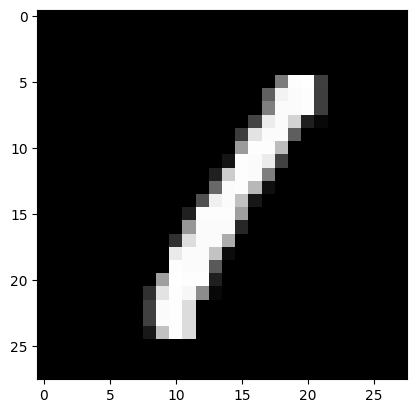

1


In [322]:
plt.imshow(image, cmap='gray')
plt.show()
print(label)

In [323]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [324]:
data_train_iter = iter(train_loader)
image, labels = data_train_iter.__next__()
print(image.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


In [325]:
x = image.view(-1, 28*28)
print(x.shape)

torch.Size([100, 784])


$$ y_1 = \sum_i x_i w_{i, 1} + b_1 $$

$$ y= xW + b$$

In [326]:
W = torch.randn(784, 10) / np.sqrt(784)   # Xavier initialization
W.requires_grad_(True)
b = torch.zeros(10, requires_grad=True)

In [327]:
y = torch.matmul(x, W) + b
print(y[0,:])

tensor([-0.2185, -0.1296,  0.2105,  0.0851,  0.0445, -0.0733, -0.2175,  0.1527,
         0.0415,  0.3258], grad_fn=<SelectBackward0>)


$$ p(y_i) = softmax(y_i) = \frac{exp(y_i)}{\sum_j exp(y_j)} $$

In [328]:
# py_eq = torch.exp(y)/torch.sum(torch.exp(y), dim=1, keepdim=True)
# print(py_eq[0])

In [329]:
py = F.softmax(y, dim=1)
print(py[0])

tensor([0.0775, 0.0847, 0.1189, 0.1049, 0.1008, 0.0896, 0.0775, 0.1123, 0.1004,
        0.1335], grad_fn=<SelectBackward0>)


$$H_{y'}(y) = - \sum_{i} {y'}_i \log(y_i)$$

- y - множество вероятностей
- y' - целевое распределение

In [330]:
# cross_entropy_eq = torch.mean(-torch.log(py)[range(labels.shape[0]), labels])
# print(cross_entropy_eq)

tensor(2.4492, grad_fn=<MeanBackward0>)


In [331]:
cross_entropy = F.cross_entropy(y, labels)
print(cross_entropy)

tensor(2.4492, grad_fn=<NllLossBackward0>)


In [332]:
# Стохастический градиентный спуск
optimizer = torch.optim.SGD([W, b], lr=0.1)
cross_entropy.backward()
b.grad

tensor([-0.0481, -0.0677,  0.0382,  0.0631,  0.0268, -0.0020, -0.0707,  0.0350,
        -0.0134,  0.0387])

In [333]:
optimizer.step()

In [334]:
b

tensor([ 0.0048,  0.0068, -0.0038, -0.0063, -0.0027,  0.0002,  0.0071, -0.0035,
         0.0013, -0.0039], requires_grad=True)

In [335]:
print(b.grad)
optimizer.zero_grad()
print(b.grad)

tensor([-0.0481, -0.0677,  0.0382,  0.0631,  0.0268, -0.0020, -0.0707,  0.0350,
        -0.0134,  0.0387])
None


In [336]:
from tqdm import tqdm
for images, labels in tqdm(train_loader):
    optimizer.zero_grad()

    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b
    cross_entropy = F.cross_entropy(y, labels)

    cross_entropy.backward()
    optimizer.step()


100%|██████████| 600/600 [00:07<00:00, 84.57it/s]


In [337]:
correct = 0
total = len(mnist_test)

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        x = images.view(-1, 28*28)
        y = torch.matmul(x, W) + b

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum(predictions==labels).float()
print(correct / total)


100%|██████████| 100/100 [00:01<00:00, 91.25it/s]

tensor(0.9021)


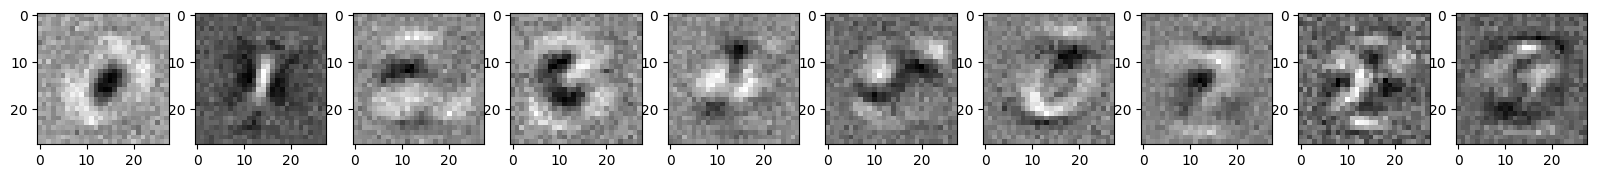

In [338]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(W[:,i].detach().view(28, 28), cmap='gray')